## **Dados de Árvores emergentes na Amazônia Brasileira**


* Dataset contendo atributos oriundos de um Modelo Digital de Terreno (MDT) bem como a localização de árvores que se elevam além do dossel florestal, ditas árvores emergentes, na Amazônia brasileira.
* Os atributos topográfico (numéricos) são:
 * Elevação (altitude) - DTM
 * Indice Topográfico de Umidade - TWI
 * Declividade - SLP
 * Aspecto (azimute da declividade) - ASP
 * Distância horizontal até o corpo dágua mais próximo - HDI
 * Distância vartical até o corpo dágua mais próximo - VDI
 * Índice de Roustez Topográfica - RGX
 * Índice de Posição Topográfica - TPI
 * Índice de Convergência Topográfica - TCI
 * Direção de Fluxo de água - DIR
 * Índice de Rugosidade Topográfica - TRI
* 3333 instâncias
* Problema de classificação binária

**Ambiente no Google Drive**

In [27]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [29]:
# Importando bibliotecas
import numpy as np
import pandas as pd

## 2. Carregamento dos dados na memória utilizando a biblioteca Pandas

Utilizaremos um DataFrame Pandas para ler os dados do dataset emergnetes.csv

In [30]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/ML_jh0n3/EMERGENTP95.csv')

In [45]:
# verificando o dataframe
dados.head()

,EMERGENT,DTM,TWI,SLP,ASP,HDI,VDI,RGX,TPI,TCI,DIR,RDM,TRI
0,1,69.231537,6.467302,4.837936,345.665070,37.213203,1.936836,0.200821,0.006599,4.057144,135,0.0,0.065393
1,1,80.112953,5.563310,6.970893,131.189835,193.592926,9.605881,0.318245,-0.005287,3.326865,240,0.0,0.088073
2,1,63.810810,4.372329,9.074281,222.812866,39.870056,4.312340,0.463135,0.002701,3.895589,62,0.0,0.124615
3,1,65.203430,5.928677,9.897301,199.786514,54.597981,5.503384,0.384621,0.025955,3.940037,60,0.0,0.103497
4,1,67.682335,6.889946,3.153691,206.229813,165.894440,19.306839,0.151451,-0.006279,3.765377,60,0.0,0.043952


In [46]:
#verificando colunas dos dados
dados.columns

Index(['EMERGENT', 'DTM', 'TWI', 'SLP', 'ASP', 'HDI', 'VDI', 'RGX', 'TPI',
       'TCI', 'DIR', 'RDM', 'TRI'],
      dtype='object')

## 3. Limpeza e organização dos dados

In [44]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [47]:
#excluir colunas irrelevantes
dados = dados.drop(columns=['RDM'])
dados.head()

,EMERGENT,DTM,TWI,SLP,ASP,HDI,VDI,RGX,TPI,TCI,DIR,TRI
0,1,69.231537,6.467302,4.837936,345.665070,37.213203,1.936836,0.200821,0.006599,4.057144,135,0.065393
1,1,80.112953,5.563310,6.970893,131.189835,193.592926,9.605881,0.318245,-0.005287,3.326865,240,0.088073
2,1,63.810810,4.372329,9.074281,222.812866,39.870056,4.312340,0.463135,0.002701,3.895589,62,0.124615
3,1,65.203430,5.928677,9.897301,199.786514,54.597981,5.503384,0.384621,0.025955,3.940037,60,0.103497
4,1,67.682335,6.889946,3.153691,206.229813,165.894440,19.306839,0.151451,-0.006279,3.765377,60,0.043952


In [36]:
# importando biblioteca para plotar gráficos
import matplotlib.pyplot as plt

## 4. Análise preliminar dos dados

#### Histograma

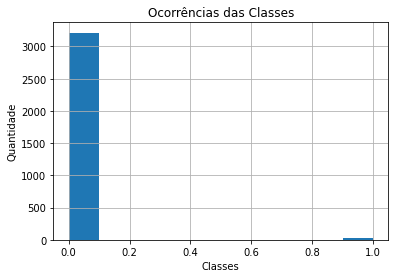

In [73]:
#verificando ocorrências das classes
plt.hist(dados['EMERGENT'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [74]:
#contando ocorrencias de cada classe
print('Não Emergente:',dados[dados['EMERGENT']==0].shape[0])
print('Emergente:',dados[dados['EMERGENT']==1].shape[0])

Não Emergente: 3213
Emergente: 33


**Comentários:**

Através dos gráfico de barras comparando o número discrepante de instâncias de árvores emergentes e árvores não emergentes, confimado pelo computo da quantidade de ocorrência de cada classe (Emergente e não emergente). Trata-se portanto de um conjunto **desbalanceado** de dados.

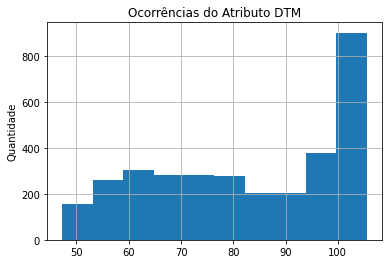

In [75]:
#verificando ocorrências do atributo elevação (DTM)
plt.hist(dados['DTM'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo DTM')
plt.grid(True)
plt.show()

### Distribuição de probabilidade

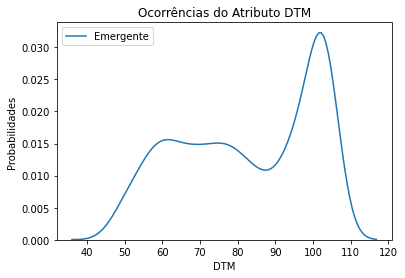

In [43]:
import seaborn as sns

sns.distplot(dados.DTM, hist=False, rug=False,label='Emergente')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo DTM')
plt.show()

### BoxPlot

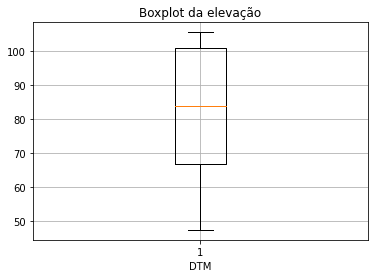

In [48]:
plt.boxplot(dados.DTM)
plt.title('Boxplot da elevação')
plt.xlabel('DTM')
plt.grid()
plt.show()

**Comentários**:
A maior parte dos dados de elvação se encontra à direita nos gráficos **(histograma e distribuição)** indicando altos valores de elevação (aprox. 100 m) nos pontos de incidencia de AEs e ANEs, assim como pode ser observado no **boxplot**.

### Análise comparativa dos atributos entre as classes

In [49]:
#criando dataframe apenas para as árvores emergentes AEs
AE = dados[dados['EMERGENT']==1].drop(columns=['EMERGENT']).reset_index(drop=True)

In [50]:
#criando dataframe apenas para as árvores não emergentes ANEs
ANE = dados[dados['EMERGENT']==0].drop(columns=['EMERGENT']).reset_index(drop=True)

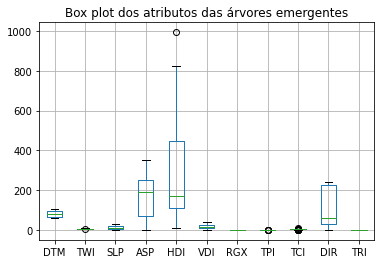

In [51]:
#plotando boxplots dos dados das instâncias emergentes
AE.boxplot()
plt.title('Box plot dos atributos das árvores emergentes')
plt.show()

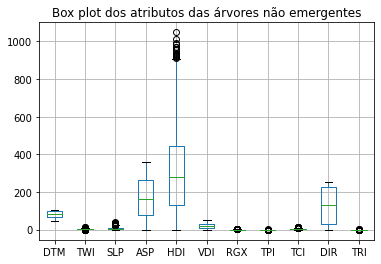

In [52]:
#plotando boxplots dos dados das instâncias não emergentes
ANE.boxplot()
plt.title('Box plot dos atributos das árvores não emergentes')
plt.show()

**Comentários**:É possivel observar nos boxplots grande variação de amplitude de valores dos atributos nas classes AEs e ANEs, o que sugere um reescalonamento dos dados.



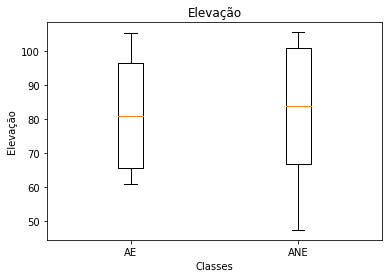

In [59]:
# box plot comparando o DTM (elevação) para as duas classes
plt.boxplot([AE.DTM,ANE.DTM],labels=['AE','ANE'])
plt.xlabel('Classes')
plt.ylabel('Elevação')
plt.title('Elevação')
plt.show()

**Comentários**: No Boxplot acima (comparação das elevações de AEs e ANEs) percebe-se a diferença do número de árvores no 1o quartil das duas classes, o que pode indicar ligeira influência da elevação na incidência de AEs na região de estudo. Embora a distância entre o 1o e 3o quartil, bem como a mediana possuam valores semelhantes.

A seguir serão apresetnadas as curvas de distribuição de probabilidade de cada atributo das duas classes  (AEs e ANEs)

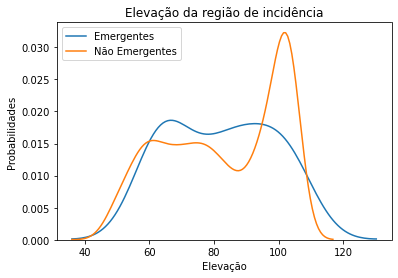

In [57]:
# distribuição de probabilidade comparando a elevação para as duas classes
sns.distplot(AE.DTM, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.DTM, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Elevação')
plt.ylabel('Probabilidades')
plt.title('Elevação da região de incidência')
plt.show()

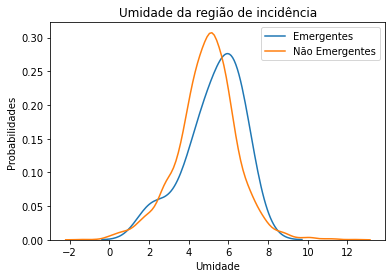

In [58]:
# distribuição de probabilidade comparando o TWI (umidade) para as duas classes
sns.distplot(AE.TWI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.TWI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Umidade')
plt.ylabel('Probabilidades')
plt.title('Umidade da região de incidência')
plt.show()

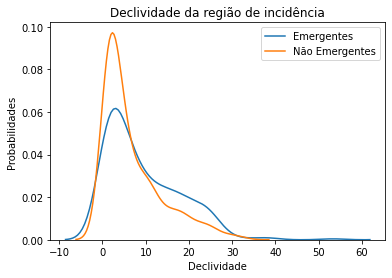

In [36]:
# distribuição de probabilidade comparando a declividade para as duas classes
sns.distplot(AE.SLP, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.SLP, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Declividade')
plt.ylabel('Probabilidades')
plt.title('Declividade da região de incidência')
plt.show()

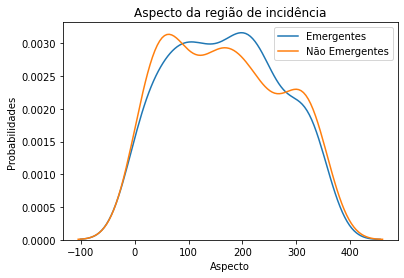

In [45]:
# distribuição de probabilidade comparando o aspecto (azimute do declive) para as duas classes
sns.distplot(AE.ASP, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.ASP, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Aspecto')
plt.ylabel('Probabilidades')
plt.title('Aspecto da região de incidência')
plt.show()

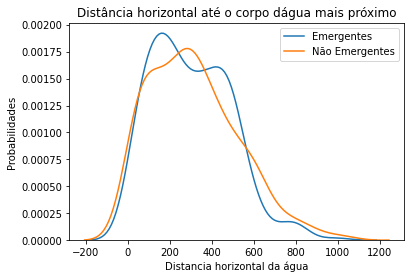

In [46]:
# distribuição de probabilidade comparando a distância horizontal até o corpo dágua mais próximo (HDI) para as duas classes
sns.distplot(AE.HDI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.HDI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Distancia horizontal da água')
plt.ylabel('Probabilidades')
plt.title('Distância horizontal até o corpo dágua mais próximo')
plt.show()

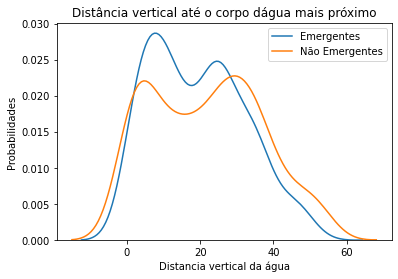

In [47]:
# distribuição de probabilidade comparando a distância vertical até o corpo dágua mais próximo (VDI) para as duas classes
sns.distplot(AE.VDI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.VDI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Distancia vertical da água')
plt.ylabel('Probabilidades')
plt.title('Distância vertical até o corpo dágua mais próximo')
plt.show()

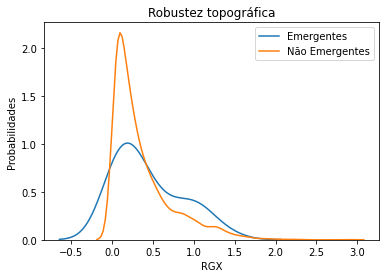

In [60]:
# distribuição de probabilidade comparando a robustez topográfica(RGX) para as duas classes
sns.distplot(AE.RGX, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.RGX, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('RGX')
plt.ylabel('Probabilidades')
plt.title('Robustez topográfica')
plt.show()

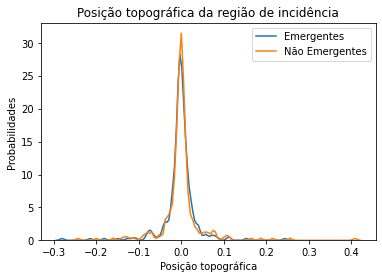

In [50]:
# distribuição de probabilidade comparando a posição topográfica (TPI) para as duas classes
sns.distplot(AE.TPI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.TPI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Posição topográfica')
plt.ylabel('Probabilidades')
plt.title('Posição topográfica da região de incidência')
plt.show()

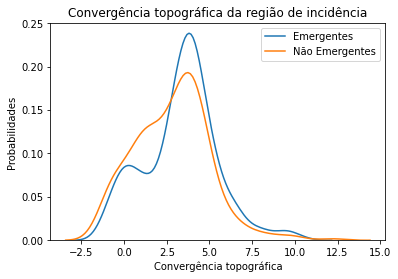

In [51]:
# distribuição de probabilidade comparando a convergencia topográfica (TCI) para as duas classes
sns.distplot(AE.TCI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.TCI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Convergência topográfica')
plt.ylabel('Probabilidades')
plt.title('Convergência topográfica da região de incidência')
plt.show()

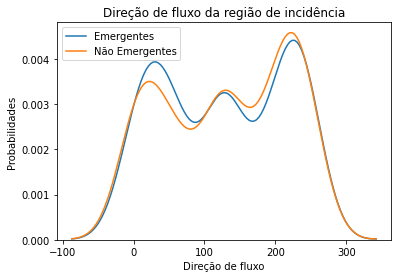

In [52]:
# distribuição de probabilidade comparando direção de fluxo dágua (DIR) para as duas classes
sns.distplot(AE.DIR, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.DIR, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Direção de fluxo')
plt.ylabel('Probabilidades')
plt.title('Direção de fluxo da região de incidência')
plt.show()

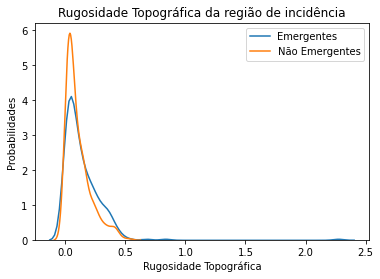

In [53]:
# distribuição de probabilidade comparando rugosidade topográfica (TRI) para as duas classes
sns.distplot(AE.TRI, hist=False, rug=False,label='Emergentes')
sns.distplot(ANE.TRI, hist=False, rug=False,label='Não Emergentes')
plt.xlabel('Rugosidade Topográfica')
plt.ylabel('Probabilidades')
plt.title('Rugosidade Topográfica da região de incidência')
plt.show()

#### Comentários
Ao se observar as curvas de distribuição da ocorrência de arvores emergentes (AE) e não emergentes (ANE), percebe-se uma ligeira superioridade quanto a distribuição das das AEs sobre as ANEs, nos atributos:
HDI, VDI, RGX, TCI. Enquanto as ANEs supram as AEs no atributos:
DTM, TWI, SLP. 
Os demais atributos (ASP, TPI e DIR) apresetaram distribuições visualmente  muito semelhantes.

###  5. Análise estatística dos dados

In [61]:
# estatistica basica dos dados - media
AE.mean()

DTM     82.075084
TWI      5.273179
SLP      9.958749
ASP    164.820562
HDI    286.957814
VDI     16.325083
RGX      0.440973
TPI      0.007718
TCI      3.526265
DIR    115.575758
TRI      0.132375
dtype: float64

In [62]:
# estatistica basica dos dados - media
ANE.mean()

DTM     82.604511
TWI      4.911490
SLP      7.231615
ASP    170.844741
HDI    301.834361
VDI     20.435056
RGX      0.360379
TPI      0.000291
TCI      2.866029
DIR    127.425459
TRI      0.110253
dtype: float64

In [63]:
# estatistica basica dos dados - mediana
AE.median()

DTM     80.883064
TWI      5.563310
SLP      6.967631
ASP    189.151840
HDI    172.375626
VDI     13.760941
RGX      0.329491
TPI     -0.000008
TCI      3.940037
DIR     62.000000
TRI      0.099741
dtype: float64

In [64]:
# estatistica basica dos dados - mediana
ANE.median()

DTM     83.714844
TWI      4.994132
SLP      4.296489
ASP    164.959457
HDI    280.918823
VDI     20.885708
RGX      0.231972
TPI     -0.001503
TCI      3.094237
DIR    131.000000
TRI      0.069638
dtype: float64

A seguir tem-se a **matriz de correlação** dos atributos estudados.

In [66]:
# correlaçao entre os atributos
corr = dados.corr()
corr

,EMERGENT,DTM,TWI,SLP,ASP,HDI,VDI,RGX,TPI,TCI,DIR,TRI
EMERGENT,1.000000,-0.002972,0.023854,0.037411,-0.005599,-0.007320,-0.028682,0.022124,0.013588,0.030176,-0.013467,0.019447
DTM,-0.002972,1.000000,-0.063990,-0.260540,0.055924,0.558818,0.733365,-0.233375,0.004866,-0.252439,-0.072427,-0.229152
TWI,0.023854,-0.063990,1.000000,-0.054543,-0.078138,-0.042140,-0.060068,-0.168385,-0.447653,0.653214,-0.257349,-0.204530
SLP,0.037411,-0.260540,-0.054543,1.000000,0.064206,-0.239504,-0.122543,0.941461,0.003248,0.241494,-0.036320,0.918567
ASP,-0.005599,0.055924,-0.078138,0.064206,1.000000,-0.038492,0.007076,0.076069,0.006145,-0.087079,-0.460518,0.080697
HDI,-0.007320,0.558818,-0.042140,-0.239504,-0.038492,1.000000,0.624236,-0.215851,-0.023258,-0.223150,0.004332,-0.209817
VDI,-0.028682,0.733365,-0.060068,-0.122543,0.007076,0.624236,1.000000,-0.109749,-0.004687,-0.195635,-0.011685,-0.107717
RGX,0.022124,-0.233375,-0.168385,0.941461,0.076069,-0.215851,-0.109749,1.000000,0.039873,0.158203,-0.015621,0.967098
TPI,0.013588,0.004866,-0.447653,0.003248,0.006145,-0.023258,-0.004687,0.039873,1.000000,-0.288257,0.242192,0.148017
TCI,0.030176,-0.252439,0.653214,0.241494,-0.087079,-0.223150,-0.195635,0.158203,-0.288257,1.000000,-0.276464,0.131441


Pra faci9litar a visualização da correlação entre os atrbutos, tem-se o "mapa de calor"

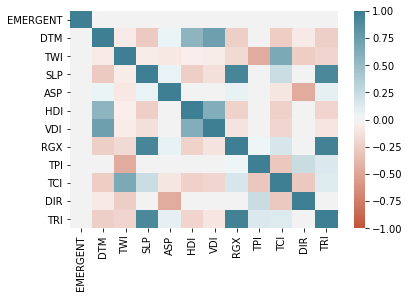

In [67]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

O mapa de calor exibe uma forte correlação entre os atributos: SLP, TRI e RGX. (já esperada conforme literatura especializada), caracterizando esses atributos como **redundantes**.

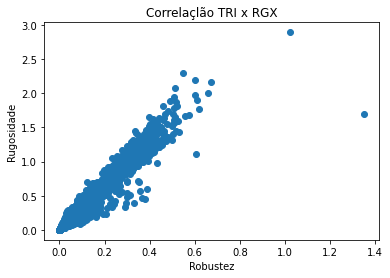

In [69]:
# plotando correlação entre Rugosidade e Robustez topográfica
plt.scatter(dados.TRI,dados.RGX)
plt.xlabel('Robustez')
plt.ylabel('Rugosidade')
plt.title('Correlaçlão TRI x RGX')
plt.show()

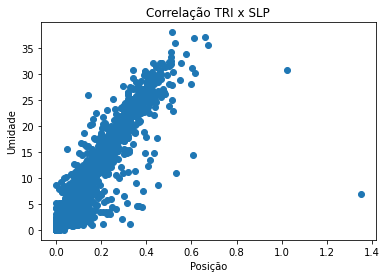

In [70]:
# plotando correlação entre posição e umidade topográfica
plt.scatter(dados.TRI,dados.SLP)
plt.xlabel('Posição')
plt.ylabel('Umidade')
plt.title('Correlação TRI x SLP')
plt.show()

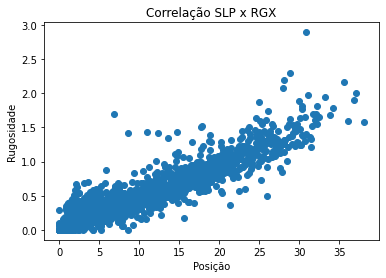

In [72]:
# plotando correlação entre posição e rugosidade topográfica
plt.scatter(dados.SLP,dados.RGX)
plt.xlabel('Posição')
plt.ylabel('Rugosidade')
plt.title('Correlação SLP x RGX')
plt.show()

Os gráfico de dispersão acima apresentam visivel, e já mencionada, elevada correlação positiva entre os atributos TRI, SLP e RGX.

## 5. Re-escala dos dados

Os atributos possuem escalas bem diferentes, como pode ser visto, por exemplo, entre os atributos HDI e TPI

In [76]:
#recuperando valores de HDI
HDI = dados.HDI
HDI

0        37.213203
1       193.592926
2        39.870056
3        54.597981
4       165.894440
           ...    
3328    705.820435
3329    618.796021
3330    401.801086
3331    277.776703
3332    121.882248
Name: HDI, Length: 3246, dtype: float64

In [77]:
#recuperando valores de TPI
TPI = dados.TPI
TPI

0       0.006599
1      -0.005287
2       0.002701
3       0.025955
4      -0.006279
          ...   
3328    0.004715
3329   -0.498322
3330   -0.009613
3331   -0.010948
3332    0.033386
Name: TPI, Length: 3246, dtype: float64

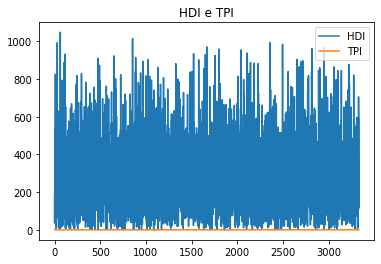

In [78]:
#plotando HDI e TPI em um mesmo gráfico
plt.plot(HDI,label='HDI')
plt.plot(TPI,label='TPI')
plt.title('HDI e TPI')
plt.legend()
plt.show()

**Comentários**:
Como pode ser visto no gráfico acima, os atributos apresentam escalas muito difertentes, necessitando da realização de um escalonamento. Como apenas um atributo assume valores negativos, decidiu-se utilizar o reescalonamento utilizando os valores máximo e mínimo.

In [79]:
#funcao de reescala usando maximo e minimo
def reescalaMaxMin(dados):
    return (dados - dados.min())/(dados.max()-dados.min())

In [80]:

norm = reescalaMaxMin(dados.drop(columns = []))

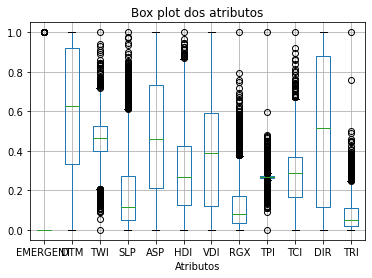

In [81]:
#plotando boxplot dos dados
norm.boxplot()
plt.title('Box plot dos atributos')
plt.xlabel('Atributos')
plt.show()

**Comentarios:**
Os dados relativos às AEs, foram detectados via processamento de uma nuvem de pontos LIDAR e constituem infomação consistente. Contudo, os dados relativos às ANEs foram simulados (amostrados aleatoriamente) sobre a área de estudo, em que qualquer lugar onde não fosse detectada uma AE, atribui-se a presenta de uma ANE. Portanto AE significa presença de árvores emergentes, e ANE, por sua vez, significa a **ausência** de árvores emergentes, e como  não foi constatado em campo a incapacidade do local possuir uma árvore emergente, a lituratura costuma denominar esses de dados de **pseudo-ausência** ou de **background**. Diante do exposto, acredita-se que a grande aderência entre as curvas de distribuição de probabilidades dos atributos das classes AEs e ANEs se deu pela amostragem aleatória das ANEs.